In [1]:
import torch
import torchvision ## suport para imagens 
import torchaudio


In [2]:
#!pip install --user torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

In [3]:
array = [[1,2,3], [3,2,1]]

tensor = torch.tensor(array)

print(tensor)

tensor([[1, 2, 3],
        [3, 2, 1]])


In [4]:
import numpy as np

np_array = np.array(array)
np_tensor = torch.from_numpy(np_array) 
print(np_array)

[[1 2 3]
 [3 2 1]]


In [5]:
tensor.shape

torch.Size([2, 3])

In [6]:
tensor.dtype

torch.int64

In [7]:
tensor.device

device(type='cpu')

In [8]:
## Aprendizado de maquina profundo requer uma GPU que em recursos de computação paralela, tempos mais rapidos e 
## desempenho

In [9]:
a = torch.tensor([[1,1], [2,2]])
b = torch.tensor([[2,2], [3,3]])

print(a + b)

tensor([[3, 3],
        [5, 5]])


In [10]:
a = torch.tensor([[1,1], [2,2]])
c = torch.tensor([[2,2,4], [3,3,5]])

print(a + c)


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [11]:
print(a*b)

tensor([[2, 2],
        [6, 6]])


In [12]:
import torch.nn as nn


input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])


In [13]:
linear_layer = nn.Linear(in_features=3, out_features=2)

In [14]:
output = linear_layer(input_tensor)
print(output)

tensor([[-0.1610,  0.1837]], grad_fn=<AddmmBackward0>)


In [15]:
linear_layer.weight

Parameter containing:
tensor([[ 0.4901, -0.0281, -0.0927],
        [ 0.0971, -0.4653, -0.3516]], requires_grad=True)

In [16]:
linear_layer.bias

Parameter containing:
tensor([-0.3402,  0.2788], requires_grad=True)

#### Qual e a operação usada :
$$
    y_0 = W_0 \cdot X + b_0
$$
* X input array
* W weight (peso)
* b bias (vies)


#### Obs 
* Redes apenas com camadas lineares são chamadas de redes totalmente conectadas

In [17]:
model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18,20),
    nn.Linear(20, 5)
)

In [18]:
input_tensor = torch.tensor([[-0.014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]])

In [19]:
out = model(input_tensor)
print(out)

tensor([[-0.4594,  0.0328,  0.0045,  0.4331,  0.2232]],
       grad_fn=<AddmmBackward0>)


#### Função sigmoid
* Função utilizada para problemas de classificação binária

* Suposição: imagine que você quer classificar um animal se é mamifero ou não. Recebemos 3 informações número de membros se põe ovos e se tem pelos.  

* A função simgoide transforma um número inteiro em um valor entre zero e um.
* Se o valor maior que 0.5 então a resposta sera 1 caso contrario sera 0

$$
    \sigma(x) = \frac{1}{1 + e^{-1}}
$$

##### Obs:
Uma rede neural com camadas lineares é equivalente a uma regressão logística usando aprendizado de maquina tradicional
* Para rotulos de varias classes usamos softmax outra função de ativação
$$
    SoftMax(z)_i = \frac{e^{z^i}}{\sum_{j=1}^{K} e^{z_i}}
$$
$z = (z_1, z_2, ..., z_K) z_i \text{ \space um numero real }$



In [20]:

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

tensor([[0.9975]])


In [21]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid()
)

In [22]:
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

prob = nn.Softmax(dim=-1) ## -1 implica que ele e aplicado a ultima dimensao do input_tensor
output = prob(input_tensor)

print(output)

tensor([[0.1392, 0.8420, 0.0188]])


----

#### Gerações de previsões a partir de modelos. "Executar uma passagem direta"
* Objetivo e propagar os dados de entrada atraves da rede e produzir predições com base nos parâmentros aprendidos peso e vies
* Isso é usado tanto para treinar quanto para gerar novas previsões
* Os resultados pode ser classificações binárias, classificações multiclasse ou previsões numéricas (regressões)
##### Obs :
* retropropagação: é p processo pelo qual os pesos e tendências das camadas são atualizadas durante o treinamento.

#### Loop de treinamento.
1. Propagate
2. Compare
3. BackPropagate
4. Repeat

In [23]:
def generate_list(num):
    import random
    list_rm = list()
    for i in range(num):
        list_rm.append(round(random.uniform(-2, 2), 4))

    return list_rm

In [24]:
generate_list(5)

[-1.9275, -1.0874, -0.2482, -1.3898, 1.0809]

In [25]:
input_data = torch.tensor(
[
        generate_list(6),
        generate_list(6),
        generate_list(6),
        generate_list(6),
        generate_list(6),
]
)
print(input_data)

tensor([[ 0.0171,  0.2902, -1.5081,  1.4158, -1.0199,  0.7561],
        [ 1.3225,  1.3476,  0.3763,  1.9474, -1.2796,  1.2184],
        [ 0.5323, -1.9900,  1.3386, -0.4971, -0.1363,  0.2276],
        [ 1.0200,  0.9126, -0.4700,  0.2838, -1.0932, -0.5283],
        [-0.6258,  1.7213, -1.3268, -1.6428, -0.2850, -0.4916]])


In [26]:
input_data.shape

torch.Size([5, 6])

In [27]:
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
print(output)

tensor([[0.3300],
        [0.4091],
        [0.5202],
        [0.4712],
        [0.4985]], grad_fn=<SigmoidBackward0>)


In [28]:
n_class = 3 ## numero de classes da multi class

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4, n_class),
    nn.Softmax(dim=-1)
)

output = model(input_data)
print(output.shape)

torch.Size([5, 3])


In [29]:
print(output)

tensor([[0.2575, 0.3410, 0.4016],
        [0.2403, 0.3731, 0.3866],
        [0.3203, 0.3118, 0.3679],
        [0.2560, 0.3416, 0.4024],
        [0.2537, 0.3169, 0.4294]], grad_fn=<SoftmaxBackward0>)


In [30]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1)

)

output = model(input_data)
print(output)

tensor([[0.7823],
        [0.6959],
        [0.1293],
        [0.3867],
        [0.2232]], grad_fn=<AddmmBackward0>)


#### Avaliar as predições com os valores reais
* Avaliaremos isso com uma função de perda 
* Ele pega uma as previsões do modelo e um valor verdadeiro e gera um float
##### Exemplo:
Digamos que vamos prever com o modelo se um animal é um mamifero um pássaro ou outros.

$$
    loss = F(y, \hat{y}) 
$$
Usamos a codificação one-hot para transformar o inteiro y em um tensor
* Quando $y = 0$ ha três classes ou  seja $\hat{y} = [1,0,0]$

##### Função de perda  entropia cruzada, é a função mais utilizada para problemas de classificação
Função para variaveis class binarias
$$
    CrossEntropyLoss(y, \hat{y}) = - (y \cdot log(\hat{y}) + (1 - y) \cdot log(1 - \hat{y}))
$$
Função para multi class
$$
    CrossEntropyLoss(y, \hat{y}) = - \sum_{i=1}^{C} y_i \cdot log(\hat{y_i})
$$



In [31]:
import torch.nn.functional as F

print(F.one_hot(torch.tensor(0), num_classes=3))
print(F.one_hot(torch.tensor(1), num_classes=3))
print(F.one_hot(torch.tensor(2), num_classes=3))

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])


In [32]:
from torch.nn import CrossEntropyLoss

score = torch.tensor([[-0.1211, 0.1059]])
one_hot_target = torch.tensor([[1, 0]])

criterion = CrossEntropyLoss()

criterion(score.double(), one_hot_target.double()) ## valor de perda

tensor(0.8131, dtype=torch.float64)

#### Resumo 
* A função de perda toma como entrada o tensor de pontuações que é o modelo
* Ele gera um ponto flutuante da perda da amostra $\newline$
Obs: **O objetivo do treinamento é minimizar a perda.**

In [33]:
y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


---


#### Atualizando os parametros do modelo.

OBS : pensamos na função de perda como uma função "Vale"
* por conta pode existir o minimo local e o minimo global
* e pode existir o maximo global e o maximo local

Deep learning gradient = derivada

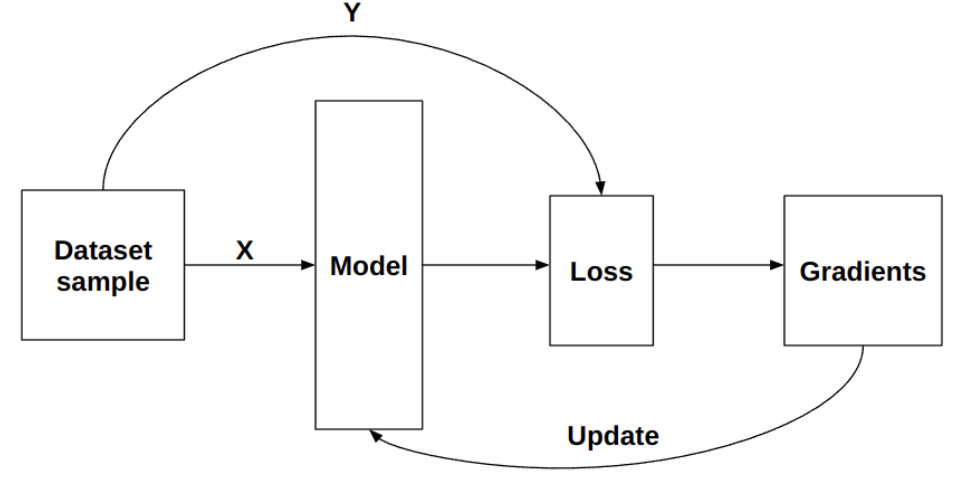

In [51]:
sample = torch.tensor(
[
        generate_list(16),
        generate_list(16),
        generate_list(16),
        generate_list(16),
        generate_list(16),
]
)

In [52]:
target = torch.tensor(
[
    generate_list(2),
    generate_list(2),
    generate_list(2),
    generate_list(2),
    generate_list(2)
]
)

In [53]:
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4), 
    nn.Linear(4,2)
)

prediction = model(sample)

criterion = CrossEntropyLoss()

In [54]:
prediction

tensor([[ 0.2072, -0.0654],
        [ 1.1159,  0.1744],
        [ 0.7691, -0.2471],
        [ 1.0765,  0.1007],
        [ 0.2654, -0.1983]], grad_fn=<AddmmBackward0>)

In [55]:
loss = criterion(prediction, target)

In [56]:
loss.backward()

In [58]:
print(loss)

tensor(-0.2098, grad_fn=<DivBackward1>)


In [59]:
model[0].weight.grad, model[0].bias.grad

(tensor([[-3.0783e-02, -8.7809e-03,  2.8696e-02,  1.1991e-02, -6.7300e-03,
           1.2215e-02,  1.4044e-02,  4.3003e-03, -6.1890e-03, -5.5856e-03,
           4.4855e-02,  1.0709e-02,  2.1675e-02, -2.5990e-02, -2.3731e-02,
          -1.6616e-03],
         [ 7.9560e-02,  2.2694e-02, -7.4165e-02, -3.0990e-02,  1.7394e-02,
          -3.1571e-02, -3.6298e-02, -1.1114e-02,  1.5995e-02,  1.4436e-02,
          -1.1593e-01, -2.7679e-02, -5.6020e-02,  6.7171e-02,  6.1332e-02,
           4.2945e-03],
         [-4.3633e-02, -1.2446e-02,  4.0675e-02,  1.6996e-02, -9.5394e-03,
           1.7314e-02,  1.9907e-02,  6.0955e-03, -8.7725e-03, -7.9173e-03,
           6.3579e-02,  1.5180e-02,  3.0723e-02, -3.6839e-02, -3.3637e-02,
          -2.3552e-03],
         [-3.0700e-03, -8.7571e-04,  2.8618e-03,  1.1958e-03, -6.7117e-04,
           1.2182e-03,  1.4006e-03,  4.2887e-04, -6.1721e-04, -5.5705e-04,
           4.4733e-03,  1.0680e-03,  2.1616e-03, -2.5919e-03, -2.3666e-03,
          -1.6571e-04],
    

In [60]:
model[1].weight.grad, model[1].bias.grad

(tensor([[-0.0355,  0.0413, -0.0423,  0.0147, -0.0064,  0.0072, -0.0499, -0.0184],
         [ 0.0886, -0.1032,  0.1055, -0.0367,  0.0160, -0.0181,  0.1246,  0.0460],
         [ 0.0751, -0.0875,  0.0895, -0.0311,  0.0136, -0.0153,  0.1056,  0.0390],
         [ 0.1386, -0.1615,  0.1651, -0.0574,  0.0251, -0.0283,  0.1949,  0.0719]]),
 tensor([ 0.0349, -0.0872, -0.0739, -0.1365]))

In [62]:
model[2].weight.grad, model[2].bias.grad

(tensor([[ 0.2676, -0.1942, -0.1873, -0.2034],
         [-0.2676,  0.1942,  0.1873,  0.2034]]),
 tensor([-0.2875,  0.2875]))

In [63]:
## Atualizando as camadas do modelo

In [65]:
# learning rate is typically small taxa de aprendizado
lr = 0.001

## upadete the weights atualizanfo os pesos
weight = model[0].weight
weight_grad =model[0].weight.grad
weight = weight - lr* weight_grad

In [66]:
# update the biases atualizanfo os vies
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

### OBS matemáticas ....
* Minimizar a função perda o objetivo e encontrar o minimo global.
* Quando temos apenas um minimo global sabemos que nossa função e convexa.
* Qaundo temos varios minimos locais sabemos que nossa função não e convexa.

In [68]:
# Gradiente descendente

import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)     ## gradiente estocastico mais conhecido

In [72]:
optimizer.step()

None


#### Writing our first training loop
1. Criar o modelo
2. Escolher a função perda
3. Criar um dataset
4. Definir um otimizador
5. Percorrer cada elemento do conjunto de dados calcular. (ciclo de treinamento)
    * Perda
    * Clacular os gradientes locais
    * Atualizar os parametros do modelo

OBS: Criamos nosso proprio metodo fit em uma deep learning


------

In [111]:
import pandas as pd


In [112]:
df = pd.read_csv("./data/ds_salaries.csv")

In [113]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [114]:
df = df[["experience_level", "employment_type", "remote_ratio", "company_size", "salary_in_usd"]]

In [115]:
df.head()

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,SE,FT,100,L,85847
1,MI,CT,100,S,30000
2,MI,CT,100,S,25500
3,SE,FT,100,M,175000
4,SE,FT,100,M,120000


In [116]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [117]:
label_encoder = LabelEncoder()
standar_scaler = StandardScaler()
scaler = MinMaxScaler()

## Transformando as variaveis em categoricas Ok
df.experience_level = label_encoder.fit_transform(df["employment_type"])
df.employment_type = label_encoder.fit_transform(df["employment_type"])
df.company_size = label_encoder.fit_transform(df.company_size)


In [120]:
df[["salary_in_usd", "remote_ratio"]] = scaler.fit_transform(
    df[["salary_in_usd", "remote_ratio"]]
)

In [121]:
df

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,2,2,1.0,0,0.181436
1,0,0,1.0,2,0.055900
2,0,0,1.0,2,0.045784
3,2,2,1.0,1,0.381839
4,2,2,1.0,1,0.258207
...,...,...,...,...,...
3750,2,2,1.0,0,0.914581
3751,2,2,1.0,0,0.327891
3752,2,2,1.0,2,0.224489
3753,0,0,1.0,0,0.213250
